In [3]:
using DifferentialEquations,Plots,DataFrames,Distributions

In [30]:
rand(([0,1]),2)

2-element Vector{Int64}:
 0
 0

In [111]:
pars=[]
function par_generator(N_Cells)
        append!(pars,N_Cells) #Adding number of cells  #1
        z = rand(Uniform(10,25),N_Cells) #A and B concentration 
        append!(pars,repeat(z,2))        #2N+1 cells
        append!(pars,rand(Uniform(5,8),N_Cells)) #L concentration  #3N+1 cells
        append!(pars,rand(Uniform(5,8),N_Cells)) #N_b concentration  #4N+1 cells
        append!(pars,rand(Uniform(-0.5,0.5),2*N_Cells))#Noise in A and B  #6N+1 cells
        append!(pars,rand(Uniform(1,5),4)) #Alpha and Beta,Beta_L,Beta_n_b  #Parameters start  #6N+5
        append!(pars,rand(Uniform(1,1.1),2)) #K and K'  #6N+7
        append!(pars,rand(Uniform(1,1.1),2)) # tau_l and Tau_n_b #6N+9
        append!(pars,rand(Uniform(0.002,0.005),2)) #Degradation rate #6N+11
        for i in 1:1:4
          y = rand([0,1],1)
          append!(y,1)
          append!(pars,y)     #8 Theta_i parameters    #6N+19
        end
    

    
end
par_generator(2)

In [112]:
pars

31-element Vector{Any}:
  2
 16.361806002347542
 16.60578792232515
 16.361806002347542
 16.60578792232515
  6.671456936609244
  6.418092916086755
  6.967636536370463
  7.700926744814183
  0.35069393435765994
  0.45271904659967654
 -0.25105614280206145
 -0.18281680419802282
  ⋮
  1.0974741906752314
  1.0082515868164297
  0.0031697059413903594
  0.004821005579086048
  1
  1
  1
  1
  0
  1
  0
  1

In [113]:
p=[]
N_Cells=pars[1]
p = pars[6*N_Cells+2:6*N_Cells+19]

18-element Vector{Any}:
 1.698176105663765
 3.885356714185446
 3.83232503502718
 1.6619541048815236
 1.0151231668723584
 1.0739238116178274
 1.0974741906752314
 1.0082515868164297
 0.0031697059413903594
 0.004821005579086048
 1
 1
 1
 1
 0
 1
 0
 1

In [114]:
function Simple_model(du,u,p,t)
    N_Cells = pars[1]
    A = u[1:N_Cells]
    B = u[N_Cells+1:2*N_Cells]
    L = u[2*N_Cells+1:3*N_Cells]
    N_b = u[3*N_Cells+1:4*N_Cells]
    
    for i in 1:N_Cells
        du[i] = (p[1] + p[11]*N_b[i]/p[6]) / (1 + B[i]/p[5] + p[12]*N_b[i]/p[6]) - p[9]*A[i] # Eqn A
        du[N_Cells+i] = (p[2] + p[13]*N_b[i]/p[6]) / (1 + A[i]/p[5] + p[14]*N_b[i]/p[6]) - p[10]*B[i] # Eqn B
        du[2*N_Cells+i] = (p[3] + p[15]*A[i]/p[5] + p[17]*B[i]/p[5]) / (1 + p[18]*B[i]/p[5] + p[16]*A[i]/p[5]) - L[i]/p[7] # Eqn L
        
        if i == 1
            L_trans = L[2] 
        elseif i == N_Cells
            L_trans = L[N_Cells-1] 
        else
            L_trans = 0.5 * (L[i-1] + L[i+1]) 
        end
        du[3*N_Cells+i] = (p[4]*L_trans/(p[6]+L_trans)) - N_b[i]/p[8] # Eqn N_b
    end
end


Simple_model (generic function with 1 method)

In [115]:
N_Cells=pars[1]
u0 = zeros(4*N_Cells)
for k in 1 : 2*N_Cells
    u0[k] = (pars[k+1] +pars[4*N_Cells+1+k])
end
for k in 2*N_Cells+1:4*N_Cells
    u0[k] = pars[k+1]
end

println(u0)
tmax = 10000
tspan = (0.0,tmax)
prob  = ODEProblem(Simple_model,u0,tspan,p)
sol   = solve(prob)
df=DataFrame(sol)

[16.712499936705203, 17.058506968924824, 16.110749859545482, 16.422971118127126, 6.671456936609244, 6.418092916086755, 6.967636536370463, 7.700926744814183]


,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,16.7125,16.7446,16.8182,16.9016,16.9858,17.0682,17.1434,17.2101,17.2694
2,17.0585,17.0919,17.1685,17.2548,17.3411,17.4248,17.5002,17.5662,17.6244
3,16.1107,16.1494,16.2406,16.3491,16.4662,16.5904,16.7149,16.8367,16.9567
4,16.423,16.4624,16.5553,16.6652,16.7828,16.9064,17.0291,17.1482,17.265
5,6.67146,6.04289,4.71035,3.39695,2.29689,1.45441,0.891252,0.54662,0.345969
6,6.41809,5.81362,4.53217,3.26912,2.21123,1.40105,0.859469,0.52805,0.335099
7,6.96764,6.39079,5.17667,3.98688,2.98114,2.17466,1.57171,1.12545,0.792991
8,7.70093,7.04861,5.6772,4.3369,3.20991,2.31494,1.65573,1.1761,0.823854


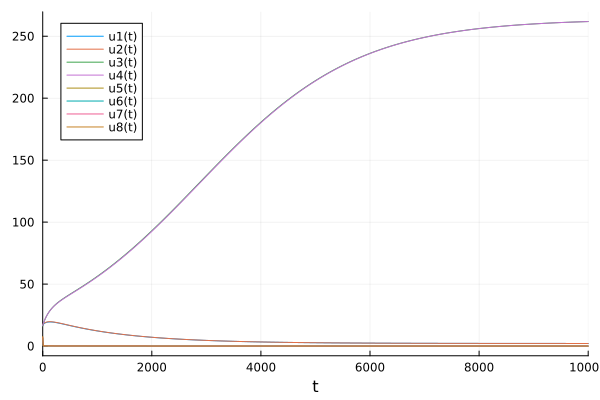

In [116]:
plot(sol)

10

In [139]:
#Colors on average over 1000 simulations with 20 cells
N_Cells = 20
iteration_no = 10
pars=[]
Overall_fate_storer=zeros(N_Cells,iteration_no,3)
for iter in 1:1:iteration_no
        append!(pars,N_Cells) #Adding number of cells  #1
        z = rand(Uniform(10,25),N_Cells) #A and B concentration 
        append!(pars,repeat(z,2))        #2N+1 cells
        append!(pars,rand(Uniform(5,8),N_Cells)) #L concentration  #3N+1 cells
        append!(pars,rand(Uniform(5,8),N_Cells)) #N_b concentration  #4N+1 cells
        append!(pars,rand(Uniform(-0.5,0.5),2*N_Cells))#Noise in A and B  #6N+1 cells
        append!(pars,rand(Uniform(1,5),4)) #Alpha and Beta,Beta_L,Beta_n_b  #Parameters start  #6N+5
        append!(pars,rand(Uniform(1,1.1),2)) #K and K'  #6N+7
        append!(pars,rand(Uniform(1,1.1),2)) # tau_l and Tau_n_b #6N+9
        append!(pars,rand(Uniform(0.002,0.005),2)) #Degradation rate #6N+11
        for i in 1:1:4
          y = rand([0,1],1)
          append!(y,1)
          append!(pars,y)     #8 Theta_i parameters    #6N+19
        end
        p=[]
        p = pars[6*N_Cells+2:6*N_Cells+19]
        u0 = zeros(4*N_Cells)
        for k in 1 : 2*N_Cells
            u0[k] = (pars[k+1] +pars[4*N_Cells+1+k])
        end
        for k in 2*N_Cells+1:4*N_Cells
            u0[k] = pars[k+1]
        end

println(u0)
        tmax = 100
        tspan = (0.0,tmax)
        prob  = ODEProblem(Simple_model,u0,tspan,p)
        sol   = solve(prob)
        df=DataFrame(sol)
    #println(df)
    #println("Works")
        Final_states = df[:,size(df,2)]
    println(Final_states)
    #println("Works")
        A_final_states=[]
        B_final_states=[]
    #println("Works")
        for i in 1:4:length(Final_states)
            append!(A_final_states,Final_states[i])
            append!(B_final_states,Final_states[i+1])
        end
    #println(A_final_states)
    #Comparing if level of A or B is higher:
        Cell_fates=[]
        for i in 1:1:length(A_final_states)
            if A_final_states[i]>B_final_states[i]
                append!(Cell_fates,'A')
                Overall_fate_storer[i,iter,1]+=1
            elseif B_final_states[i]>A_final_states[i]
                append!(Cell_fates,'B')
                Overall_fate_storer[i,iter,2]+=1
            elseif B_final_states[i] == A_final_states[i]
                append!(Cell_fates,'U')
                Overall_fate_storer[i,iter,3]+=1
            end
        end
    end

[10.981816967005871, 15.902222975482411, 11.535340392706123, 16.51860769239492, 5.730619210810374, 6.691021176271398, 6.946440548968341, 6.5316242665353474]
[13.913290505592146, 16.585833533289687, 16.915741659298018, 18.17893643023335, 0.6658591680097651, 0.6286582108227076, 0.4890717090074924, 0.5065269576809582]
[10.981816967005871, 15.902222975482411, 11.535340392706123, 16.51860769239492, 5.730619210810374, 6.691021176271398, 6.946440548968341, 6.5316242665353474]
[13.913290505592146, 16.585833533289687, 16.915741659298018, 18.17893643023335, 0.6658591680097651, 0.6286582108227076, 0.4890717090074924, 0.5065269576809582]
[10.981816967005871, 15.902222975482411, 11.535340392706123, 16.51860769239492, 5.730619210810374, 6.691021176271398, 6.946440548968341, 6.5316242665353474]
[13.913290505592146, 16.585833533289687, 16.915741659298018, 18.17893643023335, 0.6658591680097651, 0.6286582108227076, 0.4890717090074924, 0.5065269576809582]
[10.981816967005871, 15.902222975482411, 11.53534

In [144]:
N_Cells = 20
iteration_no = 10
pars = []
Overall_fate_storer = zeros(N_Cells, iteration_no, 3)

for iter in 1:iteration_no
          append!(pars,N_Cells) #Adding number of cells  #1
        z = rand(Uniform(10,25),N_Cells) #A and B concentration 
        append!(pars,repeat(z,2))        #2N+1 cells
        append!(pars,rand(Uniform(5,8),N_Cells)) #L concentration  #3N+1 cells
        append!(pars,rand(Uniform(5,8),N_Cells)) #N_b concentration  #4N+1 cells
        append!(pars,rand(Uniform(-0.5,0.5),2*N_Cells))#Noise in A and B  #6N+1 cells
        append!(pars,rand(Uniform(1,5),4)) #Alpha and Beta,Beta_L,Beta_n_b  #Parameters start  #6N+5
        append!(pars,rand(Uniform(1,1.1),2)) #K and K'  #6N+7
        append!(pars,rand(Uniform(1,1.1),2)) # tau_l and Tau_n_b #6N+9
        append!(pars,rand(Uniform(0.002,0.005),2)) #Degradation rate #6N+11
        for i in 1:1:4
          y = rand([0,1],1)
          append!(y,1)
          append!(pars,y)     #8 Theta_i parameters    #6N+19
        end
        p=[]
        p = pars[6*N_Cells+2:6*N_Cells+19]
        u0 = zeros(4*N_Cells)
        for k in 1 : 2*N_Cells
            u0[k] = (pars[k+1] +pars[4*N_Cells+1+k])
        end
        for k in 2*N_Cells+1:4*N_Cells
            u0[k] = pars[k+1]
        end

println(u0)
        tmax = 100
        tspan = (0.0,tmax)
        prob  = ODEProblem(Simple_model,u0,tspan,p)
        sol   = solve(prob)
        df=DataFrame(sol)
    #println(df)
    #println("Works")
        Final_states = df[:,size(df,2)]
    for i in 1:N_Cells
        # Simulation
        # (code omitted for brevity)

        # Update Overall_fate_storer
        cell_fate_index = 4 * (i - 1) + 1  # Calculate the index for the current cell's fate
        for j in 1:4:length(Final_states)
            A_final = Final_states[j]
            B_final = Final_states[j + 1]

            if A_final > B_final
                Overall_fate_storer[i, iter, 1] += 1
            elseif B_final > A_final
                Overall_fate_storer[i, iter, 2] += 1
            else
                Overall_fate_storer[i, iter, 3] += 1
            end
        end
    end
end


[18.629742754379233, 24.550152706317597, 16.375069660839202, 14.551367264706725, 13.728490639263011, 16.568273434572383, 10.99598515462132, 14.047784149723544, 18.098546537733796, 18.64715851586611, 14.4959112485729, 18.41669586625665, 14.747668905077857, 11.704278368179535, 10.811836560513152, 17.61777116492343, 11.548044062838397, 17.123176608552388, 18.687310515409983, 19.715162770301852, 18.93402564401533, 24.566495268423928, 15.83864150231458, 14.347519685762569, 13.855729087864427, 16.277520838820337, 11.010690304349836, 14.144887667397223, 17.868152553432015, 19.080103180680304, 14.839374558218648, 18.440022949107433, 14.331468224029837, 11.359716131343028, 10.88170090683151, 17.457407932027273, 11.701252164389107, 16.65017511642046, 18.45231638836394, 19.241664628714936, 6.533866953358225, 5.0727589384334735, 7.535979593385847, 7.959430260022446, 7.176318054218527, 7.618991805094154, 7.949150370982136, 5.741959872140638, 5.707508877052362, 5.129824612557833, 5.0723752636862, 6.

[18.629742754379233, 24.550152706317597, 16.375069660839202, 14.551367264706725, 13.728490639263011, 16.568273434572383, 10.99598515462132, 14.047784149723544, 18.098546537733796, 18.64715851586611, 14.4959112485729, 18.41669586625665, 14.747668905077857, 11.704278368179535, 10.811836560513152, 17.61777116492343, 11.548044062838397, 17.123176608552388, 18.687310515409983, 19.715162770301852, 18.93402564401533, 24.566495268423928, 15.83864150231458, 14.347519685762569, 13.855729087864427, 16.277520838820337, 11.010690304349836, 14.144887667397223, 17.868152553432015, 19.080103180680304, 14.839374558218648, 18.440022949107433, 14.331468224029837, 11.359716131343028, 10.88170090683151, 17.457407932027273, 11.701252164389107, 16.65017511642046, 18.45231638836394, 19.241664628714936, 6.533866953358225, 5.0727589384334735, 7.535979593385847, 7.959430260022446, 7.176318054218527, 7.618991805094154, 7.949150370982136, 5.741959872140638, 5.707508877052362, 5.129824612557833, 5.0723752636862, 6.

In [140]:
length(A_final_states)

LoadError: UndefVarError: `A_final_states` not defined

In [141]:
size(Overall_fate_storer)

(2, 10, 3)

In [142]:
#Finding the frequencies of given states:
Storing_array= Matrix{Float64}[]
for i in 1:1:N_Cells
    push!(Storing_array,sum(Overall_fate_storer[i,:,:],dims=1)) #Storing frequencies by summing along columns of our nx3 matrix where n is number of iterations
end

trial=1:N_Cells
plot()
for i in 1:1:3
    Fate_Array=zeros(N_Cells)
    for j in 1:1:N_Cells
        Fate_Array[j]=Storing_array[j][i]
    end
    print(Fate_Array)
    if i == 1
     plot!(trial,Fate_Array,seriestype = :scatter, legend = true,color="blue",label="A")
    elseif i == 2
     plot!(trial,Fate_Array,seriestype = :scatter, legend = true,color="red",label="B")
    elseif i == 3
     plot!(trial,Fate_Array,seriestype = :scatter, legend = true,color="white",label="U")
    end
end
    

[0.0, 10.0][10.0, 0.0][0.0, 0.0]

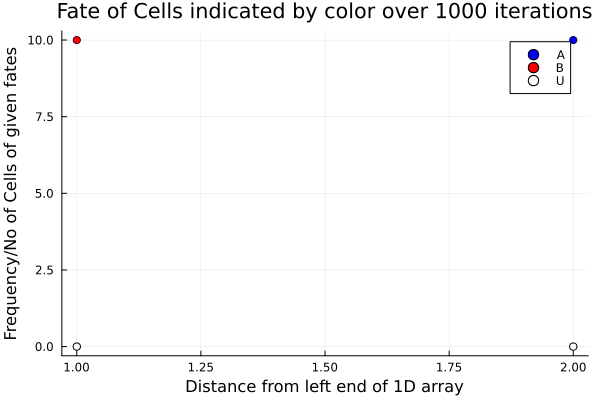

In [143]:
plot!()
# Set labels and title
xlabel!("Distance from left end of 1D array")
ylabel!("Frequency/No of Cells of given fates")
title!("Fate of Cells indicated by color over 1000 iterations")

In [43]:
function Simple_model(du,u,p,t)
    N_Cells=pars[1]
    A  = u[1:(N_Cells)]
    B  = u[(N_Cells+1):(2*N_Cells)]
    L  = u[(2*NCells+1):3*NCells]
    N_b  = u[(3*NCells+1):4*NCells]
    
    for i in 1:N_Cells
    du[i]=(p[1]+(p[6]*N_b[i]/p[10]))/(1+(B[i]/p[3])+(p[7]*N_b[i]/p[10]) -p[4]*A[i] #Eqn A
    du[(1*N_Cells)+i]= ((p[2]+(p[8]*N_b[i]/p[10]))/(1+(A[i]/p[3])+(p[9]*N_b[i]/p[10])))-p[5]*B[i] #Eqn B
    du[(2*NCells+i)]= (p[11]+(p[12]*A[i]/p[3])+(p[13]*B[i]/p[3]))/(1+(p[14]*B[i]/p[3])+(p[15]*A[i]/p[3]) -L[i]/p[16] #Eqn L
    if i == 1
            L_trans = L[2] 
        elseif i == NCells
            L_trans = L[NCells-1] 
        else
            L_trans = 0.5 * (L[i-1] + L[i+1]) 
        end
    du[(3*NCells+i)]= (p[17]*L_trans/(p[18]+L_trans)) -N_b[i]/p[19] #Eqn N_b
    
    end
    
end

LoadError: syntax: missing comma or ) in argument list